In [1]:
# 1 Import dependencies.
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 2 Define the function for calculating gradients.
def generate_gradient(x, theta, y):
    sample_count = x.shape[0]
    return (1./sample_count)*x.T.dot(x.dot(theta)-y)

In [3]:
# 3 Define the function for reading datasets.
def get_training_data(file_path):
    orig_data = np.loadtxt(file_path, skiprows=1)
    cols = orig_data.shape[1]
    return (orig_data, orig_data[:,:cols -1], orig_data[:, cols-1:])

In [4]:
# 4 Define the function for initializing parameters.
def init_theta(feature_count):
    return np.ones(feature_count).reshape(feature_count, 1)

In [5]:
# 5 Define the function for implementing gradient descent.
def gradient_descending(x, y, theta, alpha):
    jthetas = []
    jtheta = (x.dot(theta)-y).T.dot(x.dot(theta)-y)
    index = 0
    gradient = generate_gradient(x, theta, y)
    
    while not np.all(np.absolute(gradient) <=1e-5):
        theta = theta - alpha * gradient
        gradient = generate_gradient(x, theta, y)
        jtheta = (x.dot(theta)-y).T.dot(x.dot(theta)-y)
        
        if (index + 1) % 10 == 0:
            jthetas.append((index, jtheta[0]))
            
        index += 1
    return theta, jthetas

In [6]:
# 6 Define the function for visualizing the change curve of the loss function.
def show_jtheta(diff_value):
    p_x = []
    p_y = []
    
    for (index, sum) in diff_value:
        p_x.append(index)
        p_y.append(sum)
        
    plt.plot(p_x, p_y, color='blue')
    plt.xlabel('steps')
    plt.ylabel('loss function')
    plt.title('step - loss function curve')
    plt.show()

In [7]:
# 7  Define the function for visualizing data points and the fitted curve.
def showlinecurve(theta, sample_training_set):
    x = sample_training_set[:,1]
    y = sample_training_set[:,2]
    z = theta[0] + theta[1] * x
    plt.scatter(x, y, color='blue', marker='x', label='sample data')
    plt.plot(x, z, color='red', label='regression curve')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('linear regression curve')
    plt.legend()
    plt.show()

w:3.0076279423997594 b:1.668677412281192


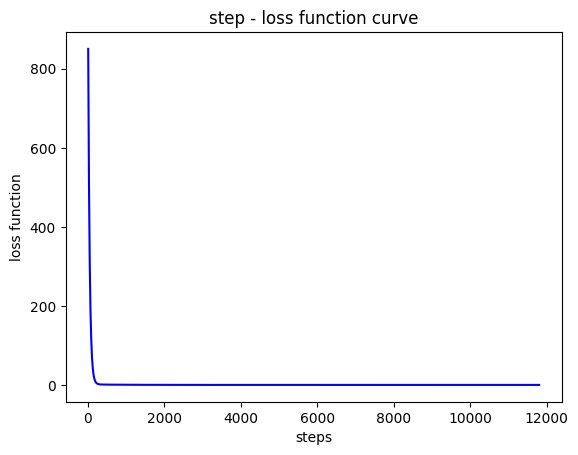

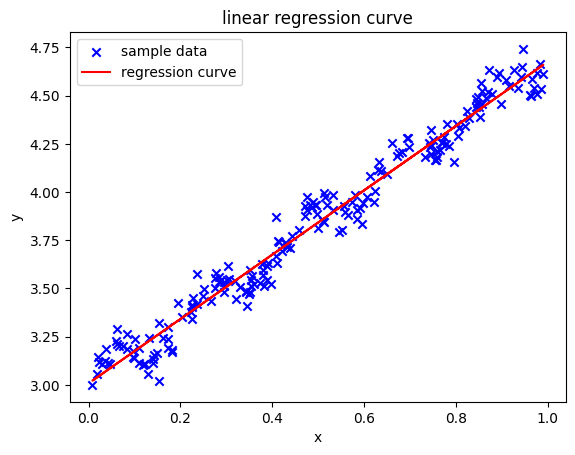

In [8]:
# 8 Plot the final results.

training_data_include_y, training_x, y = get_training_data('ML/02/lr2_data.txt')
sample_count, feature_count = training_x.shape
alpha = 0.01
theta = init_theta(feature_count)
result_theta, jthetas = gradient_descending(training_x, y, theta, alpha)

print("w:{}".format(result_theta[0][0]), "b:{}".format(result_theta[1][0]))

show_jtheta(jthetas)
showlinecurve(result_theta, training_data_include_y)